In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
test = pd.read_excel(r'D:\mehul sirohi\test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [3]:
train = pd.read_excel(r'D:\mehul sirohi\Data_train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test=train.append(test)
test.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8464\1180601199.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test=train.append(test)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [5]:
test.tail(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [6]:
test['Date_of_Journey'].str.split('/').str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [7]:
test['Date']=test['Date_of_Journey'].str.split('/').str[0]
test['Month']=test['Date_of_Journey'].str.split('/').str[1]
test['Year']=test['Date_of_Journey'].str.split('/').str[2]

In [8]:
test['Date']=test['Date'].astype(int)
test['Month']=test['Month'].astype(int)
test['Year']=test['Year'].astype(int)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [10]:
test.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [11]:
test.drop('Date_of_Journey',axis=1,inplace=True)

In [12]:
test.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [13]:
test['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [14]:
test['Arrival_Time']=test['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [15]:
test['Hours']=test['Arrival_Time'].str.split(':').str[0]
test['Minutes']=test['Arrival_Time'].str.split(':').str[1]


In [16]:
test.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [17]:
test['Hours']=test['Hours'].astype(int)
test['Mintues']=test['Minutes'].astype(int)

In [18]:
test.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
test.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,35


In [20]:
test['Dep_Time'].str.split(' ').str[0]

0       22:20
1       05:50
2       09:25
3       18:05
4       16:50
        ...  
2666    20:30
2667    14:20
2668    21:50
2669    04:00
2670    04:55
Name: Dep_Time, Length: 13354, dtype: object

In [21]:
test['Hours']=test['Dep_Time'].str.split(':').str[0]
test['Minutes']=test['Dep_Time'].str.split(':').str[1]
test['Hours']=test['Hours'].astype(int)
test['Mintues']=test['Minutes'].astype(int)
test.drop('Dep_Time',axis=1,inplace=True)


In [22]:
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,9,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,05,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,50


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Hours            13354 non-null  int32  
 12  Minutes          13354 non-null  object 
 13  Mintues          13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.3+ MB


In [24]:
test['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [26]:
test['Total_Stops']=test['Total_Stops'].map({'non-stop':0, '1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [27]:
test[test['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Mintues
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,45,45


In [28]:
test.drop('Route',axis=1,inplace=True)

In [29]:
test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Mintues
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,9,25,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,18,05,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,16,50,50


In [30]:
test['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Hours            13354 non-null  int32  
 11  Minutes          13354 non-null  object 
 12  Mintues          13354 non-null  int32  
dtypes: float64(2), int32(5), object(6)
memory usage: 1.2+ MB


In [32]:
test['duration_hour']=test['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [33]:
test[test['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Mintues,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,50,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,50,50,5m


In [34]:
test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Mintues,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,9,25,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,18,05,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,16,50,50,4


In [35]:
print(test.loc[:, test.isnull().any()])

      Total_Stops    Price
0             0.0   3897.0
1             2.0   7662.0
2             2.0  13882.0
3             1.0   6218.0
4             1.0  13302.0
...           ...      ...
2666          1.0      NaN
2667          0.0      NaN
2668          1.0      NaN
2669          1.0      NaN
2670          1.0      NaN

[13354 rows x 2 columns]


In [37]:
nan_values = test[test.isna().any(axis=1)] 

In [38]:
nan_values

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Mintues,duration_hour
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,45,45,23
0,Jet Airways,Delhi,Cochin,10h 55m,1.0,No info,NaN,6,6,2019,17,30,30,10
1,IndiGo,Kolkata,Banglore,4h,1.0,No info,NaN,12,5,2019,6,20,20,4
2,Jet Airways,Delhi,Cochin,23h 45m,1.0,In-flight meal not included,NaN,21,5,2019,19,15,15,23
3,Multiple carriers,Delhi,Cochin,13h,1.0,No info,NaN,21,5,2019,8,00,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,30,30,23
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,14,20,20,2
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,21,50,50,6
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,4,00,0,15


In [40]:
test.drop(6474,axis=0,inplace=True)
test.drop(2660,axis=0,inplace=True)

In [42]:
test['duration_hour']=test['duration_hour'].astype('int')

In [43]:
test.drop('Duration',axis=1,inplace=True)

In [44]:
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Mintues,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,22,20,20,2
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,5,50,50,7
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,9,25,25,19
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,18,05,5,5
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,16,50,50,4


In [45]:
test['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [47]:
test['Airline']=labelencoder.fit_transform(test['Airline'])
test['Source']=labelencoder.fit_transform(test['Source'])
test['Destination']=labelencoder.fit_transform(test['Destination'])
test['Additional_Info']=labelencoder.fit_transform(test['Additional_Info'])

In [49]:
test.shape

(13351, 13)

In [50]:
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Minutes,Mintues,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,22,20,20,2
1,1,3,0,2.0,8,7662.0,1,5,2019,5,50,50,7
2,4,2,1,2.0,8,13882.0,9,6,2019,9,25,25,19
3,3,3,0,1.0,8,6218.0,12,5,2019,18,05,5,5
4,3,0,5,1.0,8,13302.0,1,3,2019,16,50,50,4


In [ ]:
#which airline got which number we have to find out 

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  int32  
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Hours            13351 non-null  int32  
 10  Minutes          13351 non-null  object 
 11  Mintues          13351 non-null  int32  
 12  duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(10), object(1)
memory usage: 938.7+ KB


In [52]:
test.info('price')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  int32  
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Hours            13351 non-null  int32  
 10  Minutes          13351 non-null  object 
 11  Mintues          13351 non-null  int32  
 12  duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(10), object(1)
memory usage: 938.7+ KB


In [53]:
test['Price'].isnull().values.any()

True

In [54]:
test['Price']=test['Price'].fillna(test['Price'].mean())

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  int32  
 5   Price            13351 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Hours            13351 non-null  int32  
 10  Minutes          13351 non-null  object 
 11  Mintues          13351 non-null  int32  
 12  duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(10), object(1)
memory usage: 938.7+ KB


<Figure size 864x864 with 0 Axes>

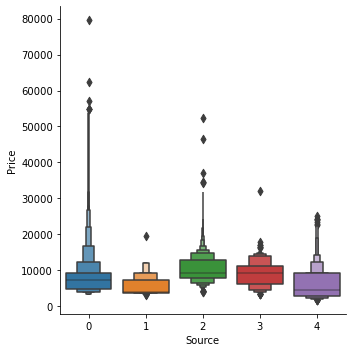

In [63]:
plt.figure(figsize=(12,12))
sns.catplot(y='Price',x='Source',data=test.sort_values('Price',ascending=False),kind='boxen')

<Figure size 864x864 with 0 Axes>

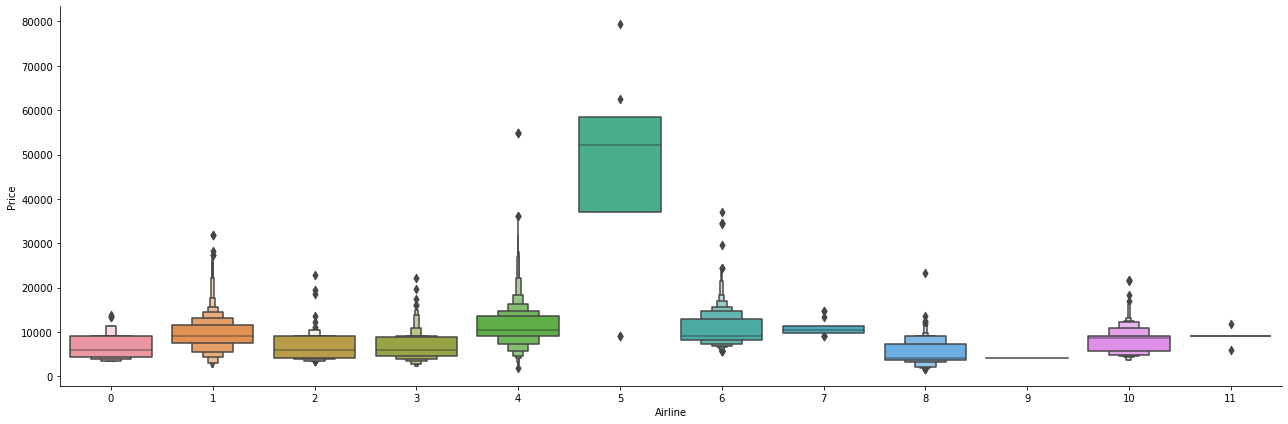

In [64]:
plt.figure(figsize=(12,12))
sns.catplot(y='Price',x='Airline',data=test.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

In [65]:
test.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Hours,Mintues,duration_hour
count,13351.000000,13351.000000,13351.000000,13350.000000,13351.000000,13351.000000,13351.000000,13351.000000,13351.0,13351.000000,13351.000000,13351.000000
mean,3.977530,1.953786,1.435248,0.825768,7.407610,9085.898979,13.390607,4.710733,2019.0,12.512995,24.502659,10.234964
std,2.363982,1.178474,1.473404,0.674478,1.198494,4124.133967,8.439749,1.165511,0.0,5.736678,18.831696,8.473072
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,1.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,6131.500000,6.000000,3.000000,2019.0,8.000000,5.000000,2.000000
50%,4.000000,2.000000,1.000000,1.000000,8.000000,9085.898979,12.000000,5.000000,2019.0,11.000000,25.000000,8.000000
75%,4.000000,3.000000,2.000000,1.000000,8.000000,11087.000000,21.000000,6.000000,2019.0,18.000000,40.000000,15.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,47.000000


<Figure size 864x864 with 0 Axes>

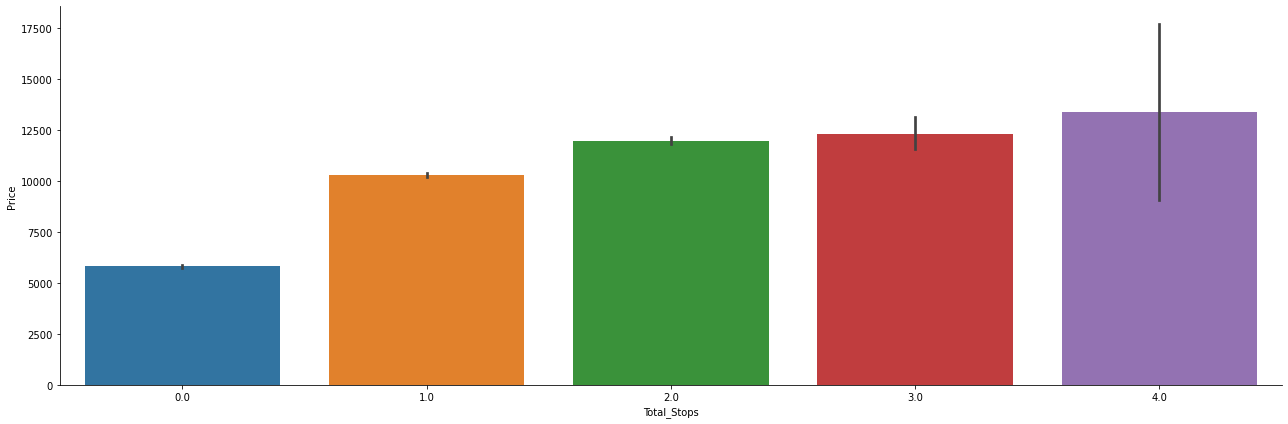

In [69]:
plt.figure(figsize=(12,12))
sns.catplot(y='Price',x='Total_Stops',data=test.sort_values('Price',ascending=True),kind='bar',height=6,aspect=3)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [76]:
scaled_test = scaler.fit_transform(test)sc

In [79]:
scaled_test.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [80]:
test.info

<bound method DataFrame.info of       Airline  Source  Destination  Total_Stops  Additional_Info  \
0           3       0            5          0.0                8   
1           1       3            0          2.0                8   
2           4       2            1          2.0                8   
3           3       3            0          1.0                8   
4           3       0            5          1.0                8   
...       ...     ...          ...          ...              ...   
2666        1       3            0          1.0                8   
2667        3       3            0          0.0                8   
2668        4       2            1          1.0                8   
2669        1       2            1          1.0                8   
2670        6       2            1          1.0                8   

             Price  Date  Month  Year  Hours Minutes  Mintues  duration_hour  
0      3897.000000    24      3  2019     22      20       20           

In [85]:
df1=pd.DataFrame(scaled_test)

In [86]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.413525,-1.657957,2.419489,-1.224352,0.494297,-1.258226,1.257122,-1.467852,0.0,1.653807,-0.239109,-0.239109,-0.971935
1,-1.259587,0.887803,-0.974140,1.741015,0.494297,-0.345273,-1.468180,0.248198,0.0,-1.309691,1.354010,1.354010,-0.381808
2,0.009506,0.039216,-0.295414,1.741015,0.494297,1.162979,-0.520249,1.106223,0.0,-0.612397,0.026411,0.026411,1.034497
3,-0.413525,0.887803,-0.974140,0.258331,0.494297,-0.695420,-0.164775,0.248198,0.0,0.956514,-1.035668,-1.035668,-0.617859
4,-0.413525,-1.657957,2.419489,0.258331,0.494297,1.022338,-1.468180,-1.467852,0.0,0.607867,1.354010,1.354010,-0.735884
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13346,-1.259587,0.887803,-0.974140,0.258331,0.494297,0.000000,-0.875723,1.106223,0.0,1.305160,0.291931,0.291931,1.506598
13347,-0.413525,0.887803,-0.974140,-1.224352,0.494297,0.000000,1.612596,-1.467852,0.0,0.259220,-0.239109,-0.239109,-0.971935
13348,0.009506,0.039216,-0.295414,0.258331,0.494297,0.000000,-0.875723,-1.467852,0.0,1.479484,1.354010,1.354010,-0.499833
13349,-1.259587,0.039216,-0.295414,0.258331,0.494297,0.000000,-0.875723,-1.467852,0.0,-1.484015,-1.301188,-1.301188,0.562395


In [87]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.335100e+04,1.335100e+04,1.335100e+04,1.335000e+04,1.335100e+04,1.335100e+04,1.335100e+04,1.335100e+04,13351.0,1.335100e+04,1.335100e+04,1.335100e+04,1.335100e+04
mean,-3.856717e-16,3.064870e-16,-1.723669e-16,-2.987789e-16,1.296585e-15,-7.293661e-17,9.423923e-17,3.646913e-16,0.0,1.134255e-17,3.205186e-16,3.205186e-16,-1.488294e-16
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,0.0,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.682618e+00,-1.657957e+00,-9.741402e-01,-1.224352e+00,-6.180995e+00,-1.776657e+00,-1.468180e+00,-1.467852e+00,0.0,-2.181308e+00,-1.301188e+00,-1.301188e+00,-1.089960e+00
25%,-4.135254e-01,3.921640e-02,-9.741402e-01,-1.224352e+00,4.942971e-01,-7.163952e-01,-8.757232e-01,-1.467852e+00,0.0,-7.867209e-01,-1.035668e+00,-1.035668e+00,-9.719346e-01
50%,9.505602e-03,3.921640e-02,-2.954143e-01,2.583312e-01,4.942971e-01,0.000000e+00,-1.647750e-01,2.481980e-01,0.0,-2.637505e-01,2.641077e-02,2.641077e-02,-2.637824e-01
75%,9.505602e-03,8.878033e-01,3.833116e-01,2.583312e-01,4.942971e-01,4.852354e-01,9.016474e-01,1.106223e+00,0.0,9.565135e-01,8.229700e-01,8.229700e-01,5.623952e-01
max,2.970722e+00,1.736390e+00,2.419489e+00,4.706382e+00,1.328709e+00,1.707722e+01,1.612596e+00,1.106223e+00,0.0,1.828131e+00,1.619529e+00,1.619529e+00,4.339207e+00
